<a href="https://colab.research.google.com/github/aeryy-afk/FSD/blob/main/Linear_Regretion-Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Prediksi Diskon Pelanggan E-Commerce
**Kelompok:** Apalah
**Anggota:** Yusril, Arya

---

## 1. Latar Belakang Masalah
E-commerce ingin meningkatkan efektivitas promosi diskon. Masalah saat ini adalah banyak diskon diberikan kepada orang yang salah (pemborosan) atau tidak diberikan kepada orang yang butuh (hilang potensi).
**Tujuan:** Membuat model Machine Learning untuk memprediksi apakah pelanggan akan menggunakan diskon atau tidak.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder



## 2. Pengumpulan Data
Data diambil dari dataset `E-commerce Customer Behavior.csv` yang berisi profil pelanggan seperti Umur, Total Belanja, dan Rating.

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df = pd.read_csv('/content/drive/MyDrive/FSD/E-commerce Customer Behavior.csv')
df


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


## 3. Pre-processing Data
Langkah yang dilakukan:
* Mengubah kolom target menjadi angka (0 dan 1).


In [27]:
# Mengubah target 'Discount Applied' dari Boolean (True/False) ke Angka (1/0)
df['Discount Applied'] = df['Discount Applied'].astype(int)


* Menghapus kolom tidak penting.


In [28]:
df = df.drop(columns=[
    'Customer ID',
    'Satisfaction Level',
    'Days Since Last Purchase'
], errors='ignore')

* Mengubah level membership menjadi skor angka.


In [29]:
df['Discount Applied'] = df['Discount Applied'].astype(int)

# Encoding Data Categorical (Mengubah teks menjadi angka)
# Untuk Gender dan City kita gunakan One-Hot Encoding (get_dummies)
# Untuk Membership Type kita gunakan Ordinal Encoding (karena ada tingkatan: Bronze < Silver < Gold)
membership_map = {'Bronze': 1, 'Silver': 2, 'Gold': 3}
df['Membership Score'] = df['Membership Type'].map(membership_map)

# Kita pilih fitur yang akan digunakan untuk prediksi
features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating',
            'Membership Score'] # 'Days Since Last Purchase' has been removed as it was dropped earlier

X = df[features]
y = df['Discount Applied']  # Target

In [30]:
# 4. Splitting Data
# Membagi data menjadi 80% untuk Latihan (Train) dan 20% untuk Ujian (Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



* Melakukan Scaling agar rentang angka data seimbang.

In [31]:
# 5. Scaling (Standarisasi)
# Logistic Regression bekerja lebih baik jika skala angkanya seragam
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 4. Metode Klasifikasi
Kami menggunakan algoritma **Logistic Regression**.
kaerna Cocok untuk klasifikasi biner (Ya/Tidak) dan mudah diinterpretasikan faktor penentunya.

In [32]:
# 6. Modeling (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [33]:
# 7. Prediksi & Evaluasi
y_pred = model.predict(X_test_scaled)

# Menampilkan Hasil
print("=== Hasil Evaluasi Model Logistic Regression ===")
print(f"Akurasi Model: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


=== Hasil Evaluasi Model Logistic Regression ===
Akurasi Model: 85.71%

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        39
           1       0.76      1.00      0.86        31

    accuracy                           0.86        70
   macro avg       0.88      0.87      0.86        70
weighted avg       0.89      0.86      0.86        70



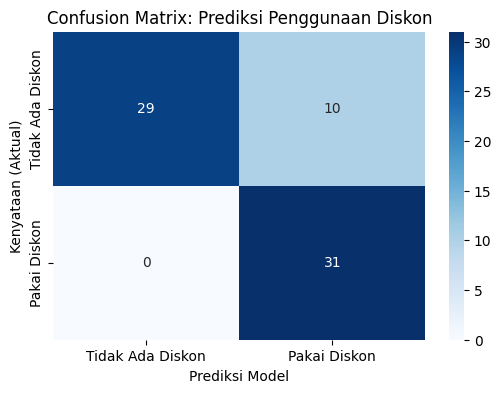

In [34]:
# 8. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Ada Diskon', 'Pakai Diskon'],
            yticklabels=['Tidak Ada Diskon', 'Pakai Diskon'])
plt.xlabel('Prediksi Model')
plt.ylabel('Kenyataan (Aktual)')
plt.title('Confusion Matrix: Prediksi Penggunaan Diskon')
plt.show()

In [35]:
# 9. Melihat Koefisien (Faktor apa yang paling berpengaruh?)
coef_df = pd.DataFrame({'Fitur': features, 'Koefisien': model.coef_[0]})
print("\n=== Faktor Penentu (Koefisien) ===")
print(coef_df.sort_values(by='Koefisien', ascending=False))



=== Faktor Penentu (Koefisien) ===
              Fitur  Koefisien
4  Membership Score   3.999346
2   Items Purchased   1.947721
0               Age   1.111270
3    Average Rating  -0.370675
1       Total Spend  -4.905241


In [36]:
import joblib

joblib.dump(model, 'model_discount_detection.pkl')
joblib.dump(scaler, 'scaler_discount_detection.pkl')

['scaler_discount_detection.pkl']

## **6. Demo Aplikasi Prediksi**

Berikut adalah implementasi model ke dalam antarmuka interaktif.
User dapat memasukkan parameter pelanggan baru, dan sistem akan memprediksi keputusan pelanggan tersebut secara *real-time*.

In [37]:
import gradio as gr
import joblib
import pandas as pd
import numpy as np

In [38]:
# Load the trained model and scaler
model = joblib.load('model_discount_detection.pkl')
scaler = joblib.load('scaler_discount_detection.pkl')

In [39]:
def predict_discount(Age, Total_Spend, Items_Purchased, Average_Rating, Membership_Type):
    # Handle potential None values from Gradio inputs by providing a default
    Age = Age if Age is not None else 30 # Default from gr.Slider value
    Total_Spend = Total_Spend if Total_Spend is not None else 500 # Default from gr.Number value
    Items_Purchased = Items_Purchased if Items_Purchased is not None else 5 # Default from gr.Slider value
    Average_Rating = Average_Rating if Average_Rating is not None else 4.0 # Default from gr.Slider value

    # Map Membership Type to Membership Score
    membership_map = {'Bronze': 1, 'Silver': 2, 'Gold': 3}
    membership_score = membership_map.get(Membership_Type, 0) # Default to 0 or handle error

    # Create a DataFrame for the input
    input_data = pd.DataFrame([{
        'Age': Age,
        'Total Spend': Total_Spend,
        'Items Purchased': Items_Purchased,
        'Average Rating': Average_Rating,
        'Membership Score': membership_score
    }])

    # Scale the input data
    input_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(input_scaled)[0]
    prediction_proba = model.predict_proba(input_scaled)[0]

    # Interpret the prediction
    result = 'Pelanggan ini kemungkinan besar akan menggunakan diskon.' if prediction == 1 else 'Pelanggan ini kemungkinan kecil akan menggunakan diskon.'
    proba_discount = f'{prediction_proba[1]*100:.2f}%'
    proba_no_discount = f'{prediction_proba[0]*100:.2f}%'

    return result, proba_discount, proba_no_discount

In [ ]:
gr.Interface(
    fn=predict_discount,
    inputs=[
        gr.Slider(minimum=18, maximum=70, step=1, label="Umur (Age)", value=30),
        gr.Number(label="Total Pengeluaran (Total Spend)", value=500),
        gr.Slider(minimum=1, maximum=50, step=1, label="Jumlah Barang Dibeli (Items Purchased)", value=5),
        gr.Slider(minimum=1, maximum=5, step=0.1, label="Rating Rata-rata (Average Rating)", value=4.0),
        gr.Dropdown(choices=['Bronze', 'Silver', 'Gold'], label="Tipe Keanggotaan (Membership Type)", value='Silver')
    ],
    outputs=[
        gr.Textbox(label="Hasil Prediksi"),
        gr.Textbox(label="Probabilitas Menggunakan Diskon"),
        gr.Textbox(label="Probabilitas Tidak Menggunakan Diskon")
    ],
    title="Prediksi Penggunaan Diskon Pelanggan E-commerce",
    description="Masukkan detail pelanggan untuk memprediksi apakah mereka akan menggunakan diskon.",
    live=True
).launch(share=False, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/gradio/queueing.py", line 759, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/gradio/route_utils.py", line 354, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/gradio/blocks.py", line 2187, in process_api
    inputs = await self.preprocess_data(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/gradio/blocks.py", line 1849, in preprocess_data
    processed_input.append(block.preprocess(inputs_cached))
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/gradio/components/slider.py", line 163, in preprocess
    Number.raise_if_out_of_bounds(payload, self.minimum, self.maximum)
  